<a href="https://colab.research.google.com/github/jim-min/gdsc-ai-study/blob/main/week6/6%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GDG 인공지능 기초 6주차 과제**
늘 그랬듯이 이번에도 퀴즈와 실습을 준비했습니다!

## **<span style="color:green"> [ 퀴즈 ] </span>**

**<span style="color:red"> 1. </span>** 흑백 이미지의 크기가 25 x 25이고, FNN 모델의 첫 번째 은닉층의 뉴런이 10개, 두 번째 은닉층의 뉴런이 100개일 때, 이 모델에 사용되는 매개변수의 개수는 몇개일까요?

**<span style="color:red"> 2. </span>** 10 x 12 x 3 크기의 행렬에 stride = 1, padding = 2로 3x3x3 크기의 필터 6개를 사용하면 나오는 feature map의 크기는 몇일까요?

① 12 x 14 x 3  
② 14 x 16 x 6  
③ 10 x 12 x 6  
④ 12 x 14 x 6  

**<span style="color:red"> 3. </span>** 이 때, stride = 2로 바꾸면 feature map의 크기는?

**<span style="color:red"> 4. </span>** CNN의 설명에 대해 올바르지 못한 것은 무엇인가요?

① 합성곱 계층에서는 하나의 필터가 입력의 전체 채널에 대해 동시에 연산을 수행한다.  
② CNN은 FNN보다 파라미터 수가 많기 때문에 학습 시간이 오래 걸린다.  
③ 여러 개의 필터를 사용하면, 입력 데이터의 다양한 특성을 동시에 추출할 수 있다.  
④ 스트라이드를 늘리면 출력 feature map의 크기가 작아진다.  

## **<span style="color:green"> [ 실습 ] </span> CNN**
Cifar10 데이터를 사용하여 CNN으로 이미지를 분류하는 작업을 해봅시다.


**<span style="color:red"> 1. </span>** 필요한 모듈과 데이터를 받아줍니다.

In [1]:
!pip install numpy torch torchvision matplotlib tqdm --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.8 MB/s eta 0:00:00


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm


**<span style="color:red"> 2. </span>** Cifar10 데이터셋을 로드합니다.

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

classes = trainset.classes

100%|██████████| 170M/170M [00:05<00:00, 30.2MB/s]


**<span style="color:red"> 3. </span>** CNN 모델을 만들어줍니다.

In [15]:
# 모델 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)     # 3 input channels, 6 filters, 5x5 kernel
        self.pool = nn.MaxPool2d(2, 2)      # 2x2 pooling
        self.conv2 = nn.Conv2d(6, 16, 5)    # 6 input channels, 16 filters, 5x5 kernel
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)        # 10 output classes (CIFAR-10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))   # conv1 + relu + pool
        x = self.pool(F.relu(self.conv2(x)))   # conv2 + relu + pool
        x = torch.flatten(x, 1)                # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cpu")
model = CNN().to(device)

# 손실함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


**<span style="color:red"> 4. </span>** 에폭 10으로, 학습을 합니다. (약간 시간이 걸립니다다)

In [16]:
# 학습 루프
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    model.train()
    for inputs, labels in tqdm(trainloader, desc=f"Epoch {epoch+1}/{epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"[Epoch {epoch+1}] Loss: {running_loss / len(trainloader):.4f}")


Epoch 1/10: 100%|██████████| 782/782 [00:22<00:00, 34.45it/s]


[Epoch 1] Loss: 1.6512


Epoch 2/10: 100%|██████████| 782/782 [00:22<00:00, 35.23it/s]


[Epoch 2] Loss: 1.3871


Epoch 3/10: 100%|██████████| 782/782 [00:22<00:00, 34.82it/s]


[Epoch 3] Loss: 1.2526


Epoch 4/10: 100%|██████████| 782/782 [00:20<00:00, 37.52it/s]


[Epoch 4] Loss: 1.1451


Epoch 5/10: 100%|██████████| 782/782 [00:21<00:00, 36.00it/s]


[Epoch 5] Loss: 1.0693


Epoch 6/10: 100%|██████████| 782/782 [00:21<00:00, 36.29it/s]


[Epoch 6] Loss: 1.0043


Epoch 7/10: 100%|██████████| 782/782 [00:21<00:00, 35.94it/s]


[Epoch 7] Loss: 0.9576


Epoch 8/10: 100%|██████████| 782/782 [00:20<00:00, 37.44it/s]


[Epoch 8] Loss: 0.9140


Epoch 9/10: 100%|██████████| 782/782 [00:21<00:00, 36.39it/s]


[Epoch 9] Loss: 0.8756


Epoch 10/10: 100%|██████████| 782/782 [00:21<00:00, 36.12it/s]

[Epoch 10] Loss: 0.8433


**<span style="color:red"> 5. </span>** 필터, feature map, 이미지를 시각화 하는 함수들을 정의합니다.

In [17]:
def visualize_filters(model):

    filters = model.conv1.weight.data.clone()
    filters = (filters - filters.min()) / (filters.max() - filters.min())  # normalize to [0,1]

    fig, axs = plt.subplots(1, 6, figsize=(12, 2))
    for i in range(6):
        axs[i].imshow(np.transpose(filters[i].numpy(), (1, 2, 0)))
        axs[i].axis('off')
    plt.suptitle('Conv1 Filters')
    plt.show()

def visualize_feature_maps(model, testloader):
    dataiter = iter(testloader)
    images, labels = next(dataiter)
    idx = random.randint(0, images.size(0) - 1)
    img = images[idx].unsqueeze(0)
    label = labels[idx].item()

    with torch.no_grad():
        x = F.relu(model.conv1(img))
        x = model.pool(x)

    fig, axs = plt.subplots(2, 3, figsize=(10, 5))
    for i in range(6):
        ax = axs[i//3, i%3]
        ax.imshow(x[0, i].cpu().numpy(), cmap='gray')
        ax.axis('off')
        ax.set_title(f'Feature Map {i+1}')
    plt.suptitle(f'Label: {classes[label]}')
    plt.show()

def visualize_test_predictions(model, testloader, num_images=5):
    model.eval()
    images_shown = 0

    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            for i in range(images.size(0)):
                if images_shown >= num_images:
                    plt.show()
                    return
                img = images[i] / 2 + 0.5  # unnormalize
                npimg = img.numpy()
                plt.subplot(1, num_images, images_shown + 1)
                plt.imshow(np.transpose(npimg, (1, 2, 0)))
                plt.title(f'P:{classes[predicted[i]]}\nT:{classes[labels[i]]}',
                          color='green' if predicted[i] == labels[i] else 'red')
                plt.axis('off')
                images_shown += 1
    plt.show()

**<span style="color:red"> 6. </span>** 모델의 정확도를 평가해봅시다.

In [8]:
def evaluate_accuracy(model, test_loader, device='cpu'):
    model.eval()  # 평가 모드 전환 (Dropout, BatchNorm 등 동작 달라짐)
    correct = 0
    total = 0

    with torch.no_grad():  # 그래디언트 계산 끄기
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    return accuracy

evaluate_accuracy(model, testloader, device)


Test Accuracy: 62.90%


62.9

선형 변환 이후 softmax를 사용하면 34%정도의 정확도가 나왔지만, CNN을 사용하니 60%이상의 정확도가 나왔습니다.

**<span style="color:red"> 7. </span>** 마지막으로 다양한 요소들을 시각화 해보겠습니다.

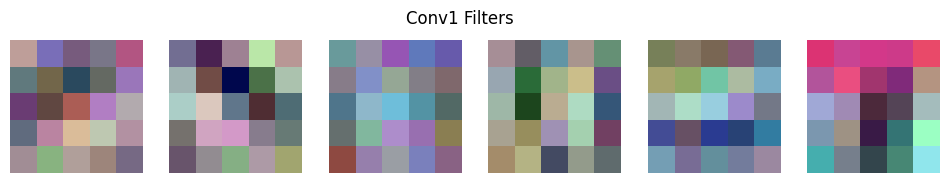

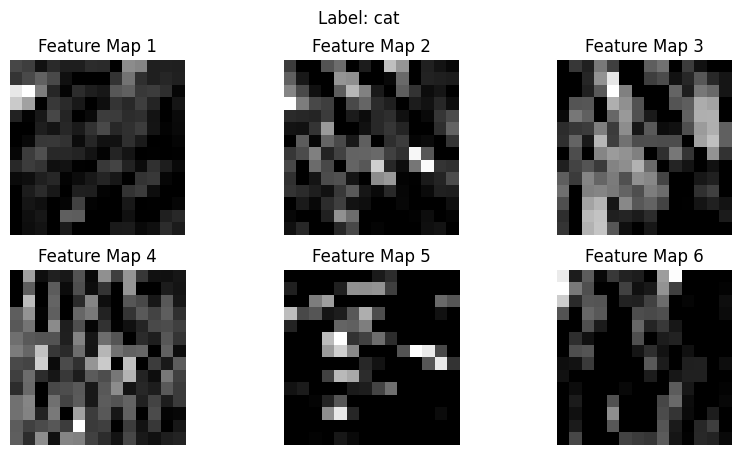

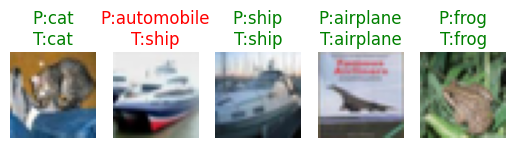

In [18]:
visualize_filters(model)
visualize_feature_maps(model, testloader)
visualize_test_predictions(model, testloader)

## 6주차 과제 끝!
여기까지 오느라 수고 많으셨고, 기말고사 다들 잘 보시길 바라겠습니다. 감사합니다!